<a href="https://colab.research.google.com/github/kakdevedant2018/PML/blob/main/DGA_detection_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import nltk

In [3]:
pip install nltk

In [4]:
df = pd.read_csv("/content/drive/MyDrive/DGA_data/dga_data.csv")

In [6]:
#Null values drop
df = df.dropna()

In [7]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
df

,isDGA,domain,host,subclass
0,dga,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,gameoverdga
1,dga,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,cryptolocker
2,dga,xxmamopyipbfpk,xxmamopyipbfpk.ru,cryptolocker
3,dga,zfd5szpi18i85wj9uy13l69rg,zfd5szpi18i85wj9uy13l69rg.net,newgoz
4,dga,jpqftymiuver,jpqftymiuver.ru,cryptolocker
...,...,...,...,...
159995,legit,manhunt,manhunt.net,alexa
159996,legit,yupptv,yupptv.com,alexa
159997,legit,bbcmundo,bbcmundo.com,legit
159998,legit,kanogames,kanogames.com,legit


In [ ]:
#Removing unnecessary columns.
df=df.drop(["subclass"],axis=1)

In [12]:
df

,isDGA,domain,host
0,dga,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com
1,dga,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru
2,dga,xxmamopyipbfpk,xxmamopyipbfpk.ru
3,dga,zfd5szpi18i85wj9uy13l69rg,zfd5szpi18i85wj9uy13l69rg.net
4,dga,jpqftymiuver,jpqftymiuver.ru
...,...,...,...
159995,legit,manhunt,manhunt.net
159996,legit,yupptv,yupptv.com
159997,legit,bbcmundo,bbcmundo.com
159998,legit,kanogames,kanogames.com


# Feature Generation
used to extract the features.

The linguistic features are 



# Number of characters.

In [13]:
df["num_characters"]=df["host"].apply(len)

In [14]:
df.head(3)

,isDGA,domain,host,num_characters
0,dga,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,30
1,dga,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,17
2,dga,xxmamopyipbfpk,xxmamopyipbfpk.ru,17


# Vowel count

In [15]:
df['Vowels'] = df.host.str.lower().str.count(r'[aeiou]')

In [16]:
df.head(3)

,isDGA,domain,host,num_characters,Vowels
0,dga,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,30,4
1,dga,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,17,1
2,dga,xxmamopyipbfpk,xxmamopyipbfpk.ru,17,4


# Number of consonant

In [20]:
df['Consonant'] = df.host.str.lower().str.count(r'[a-z]') - df['Vowels']

In [21]:
df.head(3)

,isDGA,domain,host,num_characters,Vowels,Consonant
0,dga,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,30,4,16
1,dga,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,17,1,15
2,dga,xxmamopyipbfpk,xxmamopyipbfpk.ru,17,4,12


#  Unique character rate.
It is the measure of unique characters and if lower unique character rate implies a DGA domain.


In [ ]:
# df["Unique Character rate"] = len(set(df["host"]))/df["host"].str.len()

In [22]:
s = "vedant"
print(len(set(s))/len(s))

1.0


In [24]:
len(set(df["domain"]))

159998

In [29]:
# created the list of domain unique character length.
l=[]
for i in df["domain"]:
  l.append(len(set(i)))

In [33]:
l[0]

23

In [35]:
l1=[]
for i in df["domain"]:
  l1.append(len(i))

In [41]:
# taking unique character ratio.
k=[]
for i in range(159998 ):
  j=l[i]/l1[i]
  k.append(j)
df["Unique characters ratio"]=k

In [40]:
df.head(3)

,isDGA,domain,host,num_characters,Vowels,Consonant,Unique characters ratio
0,dga,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,30,4,16,0.884615
1,dga,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,17,1,15,0.928571
2,dga,xxmamopyipbfpk,xxmamopyipbfpk.ru,17,4,12,0.928571


# Percentage of numerical characters:


In [43]:
domain =[]

In [44]:
for i in df["domain"]:
  domain.append(i)

In [45]:
alpha=[]
numeric=[]
for i in domain:
  c_alpha=0
  c_digit=0
  for j in i:
    if j.isdigit():
      c_digit+=1
    else:
      c_alpha+=1
  alpha.append(c_alpha)
  numeric.append(c_digit)
  
  #res.append[int(i) for i  in   if i.isdigit()]


In [47]:
per_n_c=[]
for i in range(len(alpha)):
  per_n_c.append(alpha[i]/(alpha[i]+numeric[i]))


In [48]:
df["percentage of numeric characters"]=per_n_c

In [49]:
df.head(3)

,isDGA,domain,host,num_characters,Vowels,Consonant,Unique characters ratio,percentage of numeric characters
0,dga,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,30,4,16,0.884615,0.653846
1,dga,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,17,1,15,0.928571,1.000000
2,dga,xxmamopyipbfpk,xxmamopyipbfpk.ru,17,4,12,0.928571,1.000000


#  Entropy 
### It is the measure of randomness that is DGA domain has higher uncertainity than of normal domain.
## In DGA there is no meaningful pattern.

In [50]:
from collections import Counter
from math import log
def shannon(string):
  counts = Counter(string)
  frequencies = ((i / len(string)) for i in counts.values())
  return - sum(f * log(f, 2) for f in frequencies)
#s = lambda i : - sum(f * log(f, 2) for f in ((j / len(i)) for j in Counter(i).values()))



In [51]:
s_list=[]
for i in df["host"]:
  s_list.append(shannon(i))
df["Shannon_Entropy"]=s_list

In [52]:
df.head(3)

,isDGA,domain,host,num_characters,Vowels,Consonant,Unique characters ratio,percentage of numeric characters,Shannon_Entropy
0,dga,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,30,4,16,0.884615,0.653846,4.440224
1,dga,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,17,1,15,0.928571,1.000000,3.616875
2,dga,xxmamopyipbfpk,xxmamopyipbfpk.ru,17,4,12,0.928571,1.000000,3.572469



# N-Gram Feature
If a domain is legit it is more likely to exists in the Alexa ranking list
Thus it is necessary to find the similarity of legit domains.
we build a legit text corpus.


# Dictionary matching

“How much of the string can be explained by a dictionary?"

Therfore, I created the function ------- in the DGA package to return the percentage of characters that are in the dictionary.

# similarity with legit domain.

In [ ]:
list1 = []
for index, rows in df.iterrows():
  if rows["isDGA"]== "legit":
    list1.append(rows["domain"])

In [ ]:
list1[0:10]

In [ ]:
# code for creating n grams from domain.
from nltk import ngrams
d=[]
for i in list1:
  l1 = list(ngrams(str(i),3))
  for i in l1: 
    sub=[]
    for j in i:
      sub.append(j)
    
    d.append("".join(sub))

print(len(d))

617729


In [ ]:
# code for creating n grams from domain.
from nltk import ngrams
for i in list1:
  l1 = list(ngrams(str(i),5))
  for i in l1: 
    sub=[]
    for j in i:
      sub.append(j)
    
    d.append("".join(sub))

print(len(d))

1078253


In [ ]:
from nltk.util import ngrams

def jaccard_similarity(str1, d, n):
  str1_bigrams=[]
  l1 = list(ngrams(str1,n))
  for i in l1: 
    sub=[]
    for j in i:
      sub.append(j)
    
    str1_bigrams.append("".join(sub))
  intersection = len(list(set(str1_bigrams).intersection(set(d))))
  union = (len(set(str1_bigrams)) + len(set(d))) - intersection

  return float(intersection) / union

In [ ]:
grams = []
import math
for i in df["domain"]:
  similarities = [jaccard_similarity(str(i), d, 3)]
  avg_similarity= sum(similarities) / len(similarities)
  grams.append(avg_similarity)
  
df["3_grams"] = grams


In [ ]:
 df

In [ ]:
df.to_csv("file1.csv")

In [ ]:
import pickle
with open("listof3gram", "wb") as fp:   #Pickling
pickle.dump(grams, fp)

# Entropy:

 

In [57]:
df.head(3)

,isDGA,domain,host,num_characters,Vowels,Consonant,Unique characters ratio,percentage of numeric characters,Shannon_Entropy
0,0,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,30,4,16,0.884615,0.653846,4.440224
1,0,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,17,1,15,0.928571,1.000000,3.616875
2,0,xxmamopyipbfpk,xxmamopyipbfpk.ru,17,4,12,0.928571,1.000000,3.572469


<AxesSubplot:>

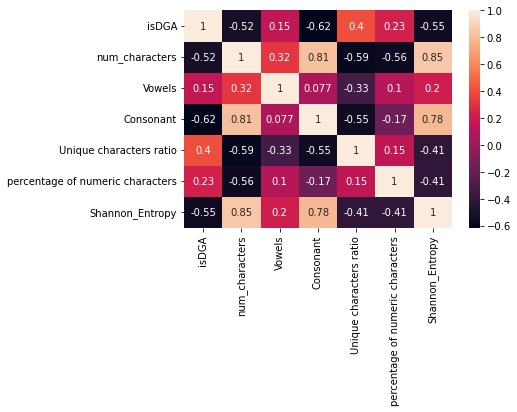

In [112]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [58]:
df1=df.drop(["isDGA"],axis=1)


In [61]:
df1.head(3)

,domain,host,num_characters,Vowels,Consonant,Unique characters ratio,percentage of numeric characters,Shannon_Entropy
0,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,30,4,16,0.884615,0.653846,4.440224
1,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,17,1,15,0.928571,1.000000,3.616875
2,xxmamopyipbfpk,xxmamopyipbfpk.ru,17,4,12,0.928571,1.000000,3.572469


In [53]:
from sklearn.preprocessing import LabelEncoder


In [54]:
LabelEncoder=LabelEncoder()

In [55]:
df["isDGA"]=LabelEncoder.fit_transform(df["isDGA"])

In [56]:
df.head(3)

,isDGA,domain,host,num_characters,Vowels,Consonant,Unique characters ratio,percentage of numeric characters,Shannon_Entropy
0,0,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,30,4,16,0.884615,0.653846,4.440224
1,0,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,17,1,15,0.928571,1.000000,3.616875
2,0,xxmamopyipbfpk,xxmamopyipbfpk.ru,17,4,12,0.928571,1.000000,3.572469


In [62]:
X=df1.drop(["host"],axis=1)
y=df["isDGA"]

In [75]:
X=X.drop(["domain"],axis=1)

In [77]:
X.head(4)

,num_characters,Vowels,Consonant,Unique characters ratio,percentage of numeric characters,Shannon_Entropy
0,30,4,16,0.884615,0.653846,4.440224
1,17,1,15,0.928571,1.000000,3.616875
2,17,4,12,0.928571,1.000000,3.572469
3,29,4,14,0.920000,0.600000,4.444188


In [78]:
y.head(4)

0    0
1    0
2    0
3    0
Name: isDGA, dtype: int64

# Train test split

In [79]:
from sklearn.model_selection import train_test_split



In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [81]:
# from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
# from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [82]:
# gnb = GaussianNB()
# mnb = MultinomialNB()
# bnb = BernoulliNB()

In [83]:
# gnb.fit(X_train,y_train)
# y_pred1 = gnb.predict(X_test)
# print(accuracy_score(y_test,y_pred1))
# print(confusion_matrix(y_test,y_pred1))
# print(precision_score(y_test,y_pred1))

In [84]:
# mnb.fit(X_train,y_train)
# y_pred2 = mnb.predict(X_test)
# print(accuracy_score(y_test,y_pred2))
# print(confusion_matrix(y_test,y_pred2))
# print(precision_score(y_test,y_pred2))

In [85]:
# bnb.fit(X_train,y_train)
# y_pred3 = bnb.predict(X_test)
# print(accuracy_score(y_test,y_pred3))
# print(confusion_matrix(y_test,y_pred3))
# print(precision_score(y_test,y_pred3))

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [87]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=100, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [88]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [89]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    
    return accuracy,precision

In [90]:
train_classifier(svc,X_train,y_train,X_test,y_test)


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.49921875, 0.0)

In [91]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  SVC
Accuracy -  0.49921875
Precision -  0.0
For  KN
Accuracy -  0.89934375
Precision -  0.876322595814719
For  NB
Accuracy -  0.83475
Precision -  0.7887376969827354
For  DT
Accuracy -  0.85396875
Precision -  0.8176273083379967


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


For  LR
Accuracy -  0.85128125
Precision -  0.8352577074157839
For  RF
Accuracy -  0.9074375
Precision -  0.8743623545595232
For  AdaBoost
Accuracy -  0.8620625
Precision -  0.8315723342281113
For  BgC
Accuracy -  0.9066875
Precision -  0.8732039613028794
For  ETC
Accuracy -  0.90753125
Precision -  0.8757188865884518
For  GBDT
Accuracy -  0.8685625
Precision -  0.8217805608494418
For  xgb
Accuracy -  0.9008125
Precision -  0.8590266525115942


In [94]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [95]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


In [96]:
performance_df1


,Algorithm,variable,value
0,KN,Accuracy,0.899344
1,ETC,Accuracy,0.907531
2,RF,Accuracy,0.907438
3,BgC,Accuracy,0.906687
4,xgb,Accuracy,0.900813
5,LR,Accuracy,0.851281
6,AdaBoost,Accuracy,0.862062
7,GBDT,Accuracy,0.868563
8,DT,Accuracy,0.853969
9,NB,Accuracy,0.834750


In [97]:
import seaborn as sns

In [98]:
import matplotlib.pyplot as plt

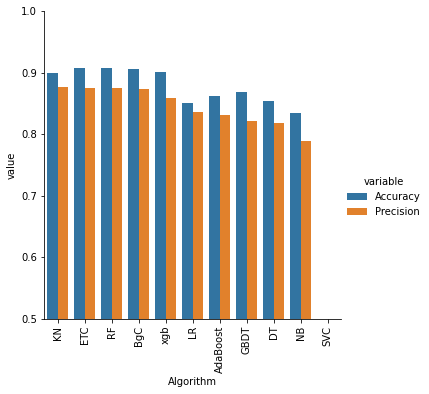

In [99]:

sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# Voting Classifier.

In [104]:
from sklearn.ensemble import VotingClassifier

In [110]:
voting = VotingClassifier(estimators=[("svm",svc),("et",etc)])

In [111]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm', SVC(gamma=1.0, kernel='sigmoid')),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))])

In [ ]:
y_pred = voting.predict(y_test)

In [ ]:
print("Accuracy",accuracy_score(y_test))

In [ ]:
print("precision",precision_score(y_test,y_pred))

# Stacking Classifier.

In [118]:
estimators=[("svm",svc),("et",etc)]

In [119]:
final_estimator = RandomForestClassifier()

In [120]:
from sklearn.ensemble import StackingClassifier

In [121]:
clf = StackingClassifier(estimators = estimators,final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy",accuracy_score(y_test,y_pred))
print("precision",precision_score(y_test,y_pred))

# ROC_AUC CURVE

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")
plt.savefig('roc.pdf')

# classification Report

In [ ]:
print(classification_report(y_test, y_pred))


In [ ]:
from dgaintel import get_prediction

In [ ]:
get_prediction("microsoft.com")

microsoft.com is genuine with probability 0.0005084530566819012


In [ ]:
get_prediction("asdfasdfasdfjl.com")

asdfasdfasdfjl.com is DGA with probability 0.9487320184707642
